In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(r'data/pandas_df2.csv', dtype='str')

In [5]:
# remove all non-alphanumeric characters
df['AT_MaraMatkl'].replace(r'[^a-zA-Z]', ' ', regex=True, inplace=True)

# remove single characters labels entries
df['AT_MaraMatkl'] = df['AT_MaraMatkl'].astype(str).apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

# remove uneccessary spaces
df['AT_MaraMatkl'] = df['AT_MaraMatkl'].astype(str).apply(lambda x: ' '.join(x.split()))

# lower case
df['AT_MaraMatkl'] = df['AT_MaraMatkl'].astype(str).apply(lambda x: x.lower())

In [6]:
df['AT_MaraMatkl']

0                 customized screws
1            xxx do not use anymore
2          printed material general
3            injected parts general
4                   idc idc jumpers
                     ...           
1219901     electronics ems general
1219902     electronics ems general
1219903     electronics ems general
1219904     electronics ems general
1219905                       dummy
Name: AT_MaraMatkl, Length: 1219906, dtype: object

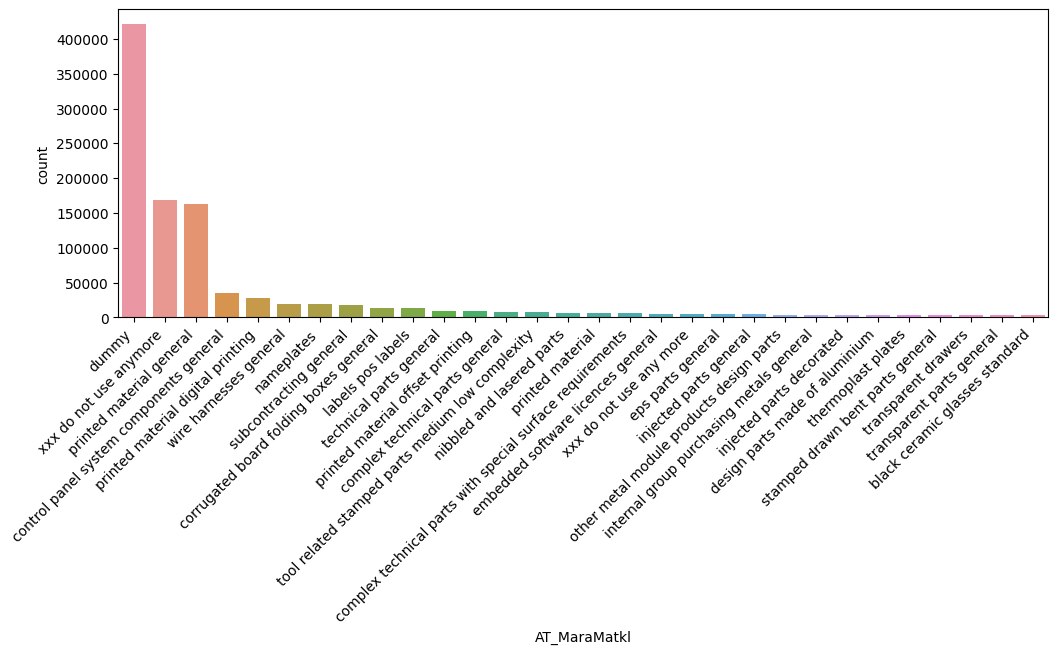

In [7]:
# plot the distribution of the labels
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12, 4))
chart = sns.countplot(x=df['AT_MaraMatkl'], order=pd.value_counts(df['AT_MaraMatkl']).iloc[:30].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()



Most labels arw dummy or xxx do not use anymore. Each other label is assigned to only a few components. 
Thoughts:
- Many labels are redundant -> similar components have different labels
- Name column is preferrable for labeling -> generating labels
- Creating label dataset from MaratMatkl isn't desireable

In [8]:
df['Name']

0                          9001422279 - Lens Head Screw M4x8
1              9001730689 - CP body laser printed WT45HV14FR
2                  9001730699 - USER MA. SE (WT45HV14FR), FR
3          9001731054 - fascia panel GV650A.UC Int  White...
4          9001762412 - Cable Harness operat. EE 590  SP....
                                 ...                        
1219901        9001795807 - PUMU1.1_WAJ24261IN BO PROGRAMMED
1219902        9001795808 - PUMU1.1_WAJ2446HIN BO PROGRAMMED
1219903           9001795809 - PUMU1.1_PROGRAMMED WM12J26SIN
1219904           9001795810 - PUMU1.1_PROGRAMMED WM12J26WIN
1219905                    8001271091 - ice tray_red diamond
Name: Name, Length: 1219906, dtype: object

In [9]:
# remove non alphanumeric characters
df['Name'].replace(r'[^a-zA-Z0-9]', ' ', regex=True, inplace=True)

# remove strings that contain numbers
df['Name'] = df['Name'].astype(str).apply(lambda x: ' '.join([w for w in x.split() if not any(c.isdigit() for c in w)]))

# lower case
df['Name'] = df['Name'].astype(str).apply(lambda x: x.lower())

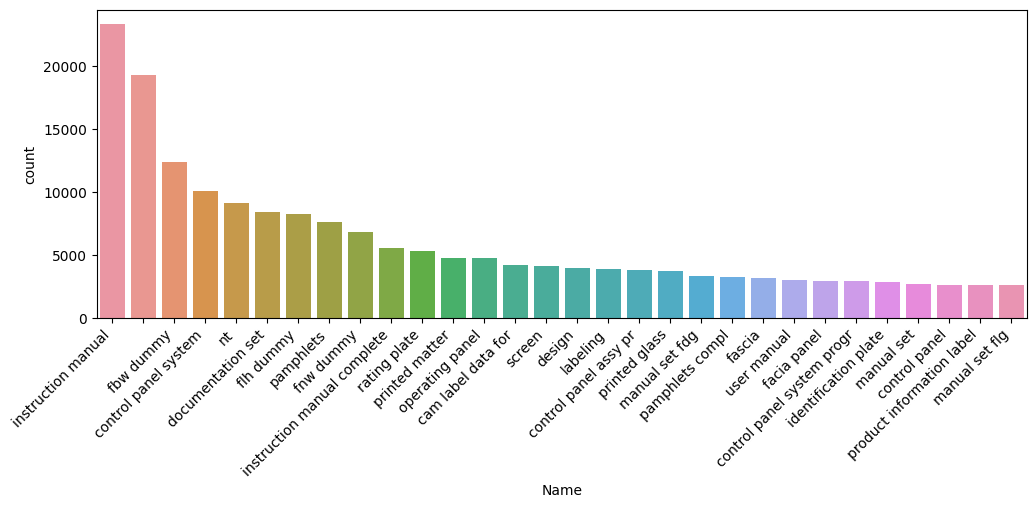

In [10]:
# plot the distribution of the names
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12, 4))
chart = sns.countplot(x=df['Name'], order=pd.value_counts(df['Name']).iloc[:30].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()


95

95

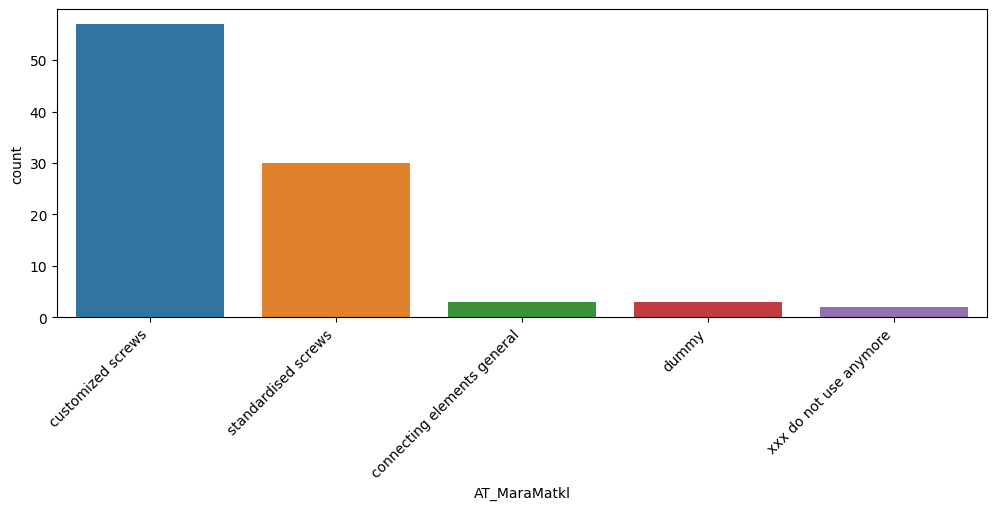

In [11]:
# get all AT_MaraMatkl values where the dataframe name contains lens head screw
labels = df[df['Name'].str.contains('lens head screw')]['AT_MaraMatkl']
display(len(df[df['Name'].str.contains('lens head screw')]),len(labels))

# plot distribution of the labels
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12, 4))
chart = sns.countplot(x=df[df['Name'].str.contains('lens head screw')]['AT_MaraMatkl'], order=pd.value_counts(df[df['Name'].str.contains('lens head screw')]['AT_MaraMatkl']).iloc[:30].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()



The three main labels for screws are "Customized screws", "Standardised screws" and "Connecting elements, General". All screws with those labels will be used for training. As we can see, the ESN numbers are close to each other/similar and can be used for hierarchical classification later on. 

Future work: We need to find out if the same behavior is the similar with other components and their labels.

First we look at the most common components that have a name not empty and without "dummy":

34101

34101

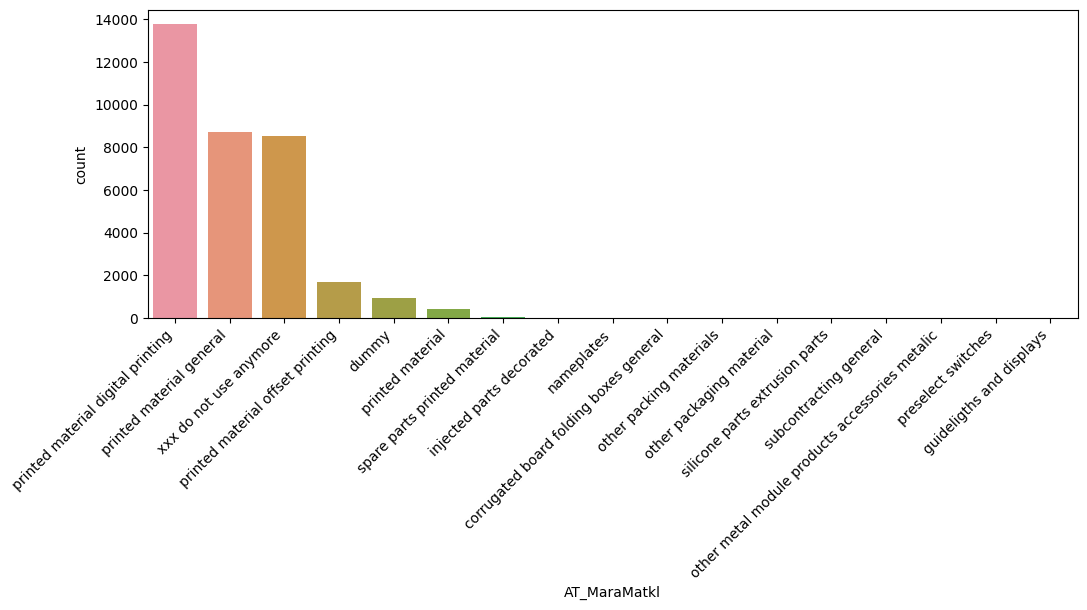

In [12]:
# get all AT_MaraMatkl values where the dataframe name contains lens head screw
labels = df[df['Name'].str.contains('instruction manual')]['AT_MaraMatkl']
display(len(df[df['Name'].str.contains('instruction manual')]),len(labels))

# plot distribution of the labels
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12, 4))
chart = sns.countplot(x=df[df['Name'].str.contains('instruction manual')]['AT_MaraMatkl'], order=pd.value_counts(df[df['Name'].str.contains('instruction manual')]['AT_MaraMatkl']).iloc[:30].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

The "xxx do not use anymore" and "dummy" instruction manual components should be used for test and validation datasets. The same should be don for other components

21828

21828

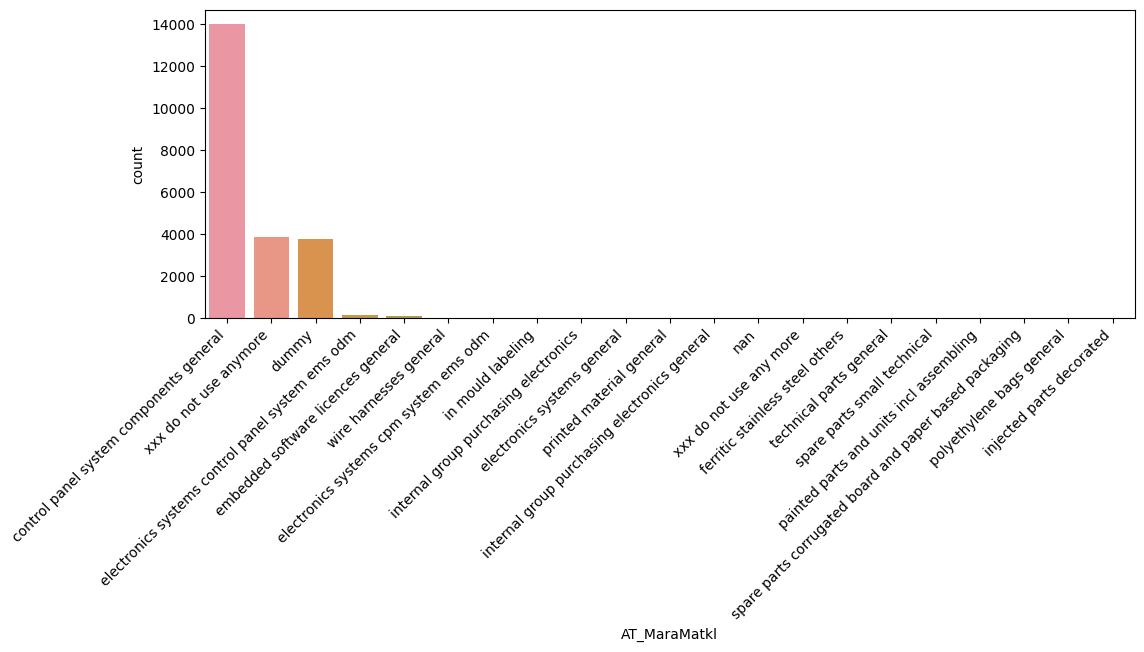

In [13]:
# get all AT_MaraMatkl values where the dataframe name contains lens head screw
labels = df[df['Name'].str.contains('control panel system')]['AT_MaraMatkl']
display(len(df[df['Name'].str.contains('control panel system')]),len(labels))

# plot distribution of the labels
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12, 4))
chart = sns.countplot(x=df[df['Name'].str.contains('control panel system')]['AT_MaraMatkl'], order=pd.value_counts(df[df['Name'].str.contains('control panel system')]['AT_MaraMatkl']).iloc[:30].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()


8826

8826

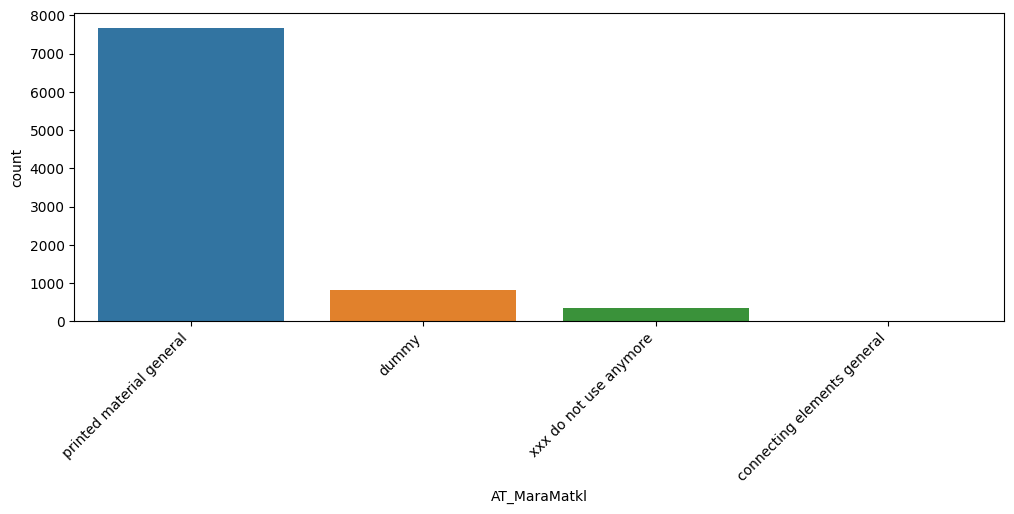

In [15]:
# get all AT_MaraMatkl values where the dataframe name contains lens head screw
labels = df[df['Name'].str.contains('documentation set')]['AT_MaraMatkl']
display(len(df[df['Name'].str.contains('documentation set')]),len(labels))

# plot distribution of the labels
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12, 4))
chart = sns.countplot(x=df[df['Name'].str.contains('documentation set')]['AT_MaraMatkl'], order=pd.value_counts(df[df['Name'].str.contains('documentation set')]['AT_MaraMatkl']).iloc[:30].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

15759

15759

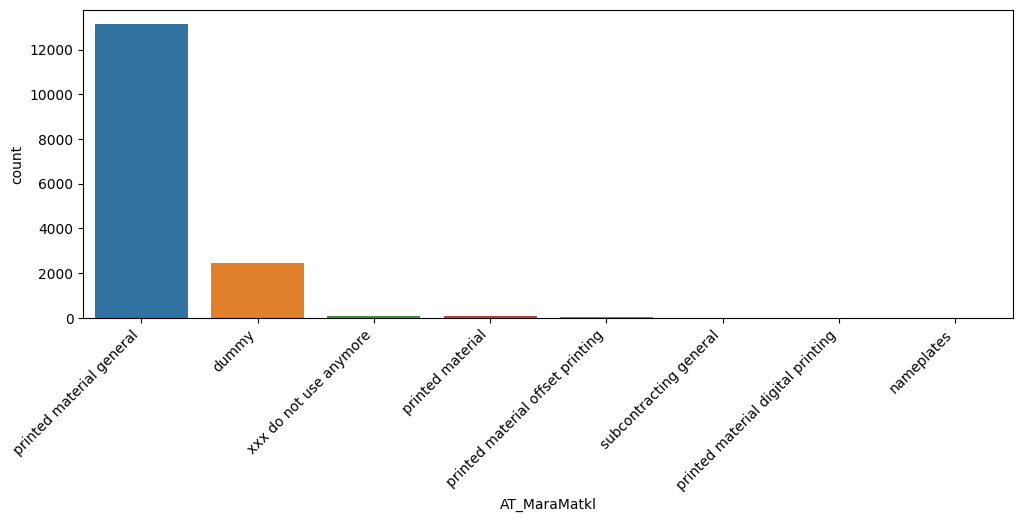

In [16]:
# get all AT_MaraMatkl values where the dataframe name contains lens head screw
labels = df[df['Name'].str.contains('pamphlets')]['AT_MaraMatkl']
display(len(df[df['Name'].str.contains('pamphlets')]),len(labels))

# plot distribution of the labels
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12, 4))
chart = sns.countplot(x=df[df['Name'].str.contains('pamphlets')]['AT_MaraMatkl'], order=pd.value_counts(df[df['Name'].str.contains('pamphlets')]['AT_MaraMatkl']).iloc[:30].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()